In [18]:
import numpy as np
import csv
import matplotlib.pyplot as plt
import pathlib

In [19]:
def read_train_test_loss_acc(root_dir):
    num_epochs = (len(list(pathlib.Path(root_dir).glob('*.txt')))//2)-1
    train_loss, test_loss, train_acc, test_acc = [],[],[],[]
    for epoch in range(num_epochs):
        with open('{}/train_log_epoch{}.txt'.format(root_dir, epoch), 'r') as f:
            reader = csv.reader(f, delimiter = '\t')
            d = list(reader)
            train_loss.append(float(d[0][2]))
            train_acc.append(float(d[0][1]))
            
    for epoch in range(num_epochs):
        with open('{}/valid_log_epoch{}.txt'.format(root_dir, epoch), 'r') as f:
            reader = csv.reader(f, delimiter = '\t')
            d = list(reader)
            test_loss.append(float(d[0][2]))
            test_acc.append(float(d[0][1]))
    
    return train_loss, test_loss, train_acc, test_acc

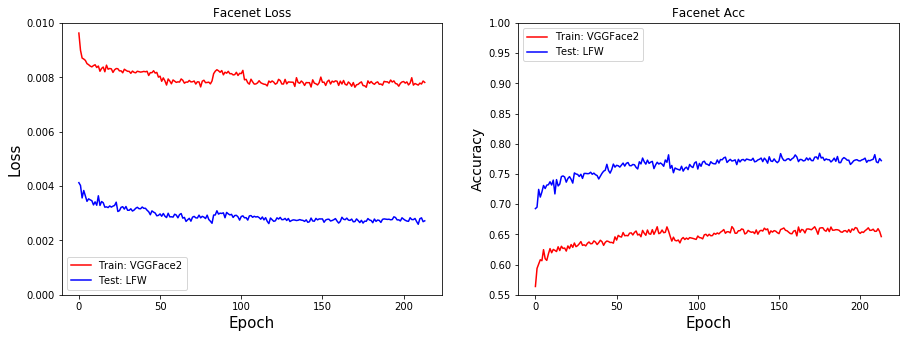

In [21]:
train_loss, test_loss, train_acc, test_acc = read_train_test_loss_acc('log')
f = plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('Facenet Loss')
plt.plot(train_loss, color = 'red', label = 'Train: VGGFace2')
plt.xlabel('Epoch', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.ylim(0, 0.01)
plt.plot(test_loss, color = 'blue', label = 'Test: LFW')
plt.legend(loc='lower left')

plt.subplot(1,2,2)
plt.title('Facenet Acc')
plt.plot(train_acc, color = 'red', label = 'Train: VGGFace2')
plt.xlabel('Epoch', fontsize = 15)
plt.ylabel('Accuracy', fontsize = 14)
plt.ylim(0.55, 1)
plt.plot(test_acc, color = 'blue', label = 'Test: LFW')
plt.legend(loc='upper left')
plt.savefig('log/a-graph-loss-fc-only-accuracy.jpg', dpi=f.dpi)